In [96]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

def data_load(a):   # load data of one persons' 7 motion. a = '\chx_'
    ra = 'ra'
    rd = 'rd'
    sa = 'sa'
    sd = 'sd'
    sit = 'sit'
    stand = 'stand'
    walk = 'walk'

    data_ra = sio.loadmat(r'C:\data_processing'+a+ra)[ra]
    data_rd = sio.loadmat(r'C:\data_processing'+a+rd)[rd]
    data_sa = sio.loadmat(r'C:\data_processing'+a+sa)[sa]
    data_sd = sio.loadmat(r'C:\data_processing'+a+sd)[sd]
    data_sit = sio.loadmat(r'C:\data_processing'+a+sit)[sit]
    data_stand = sio.loadmat(r'C:\data_processing'+a+stand)[stand]
    data_walk = sio.loadmat(r'C:\data_processing'+a+walk)[walk]
    return data_ra, data_rd, data_sa, data_sd, data_sit, data_stand, data_walk

def filt_bad_data(data):
    # count bad data number in 20-points window
    index = []
    for i in range(0,len(data) - 20, 20):
        dataWin = data[i:i+20, 0:5]
        if sum(sum(dataWin < 250)) < 2 and sum(sum(dataWin > 11000)) < 2:
            index.append(i)

    # process index[], connect data windows
    index.append(99999)# add an inf to make final value right
    a = index[0]
    b = index[0] + 20
    goodDataWinIndex = []
    for i in range(0, len(index) - 1):
        if b == index[i + 1]:
            b = index[i + 1] + 20
        else:
            goodDataWinIndex.append([a, b])
            a = index[i + 1]
            b = index[i + 1] + 20

    # filter the data with window length<80
    row = np.size(goodDataWinIndex, 0)
    col = np.size(goodDataWinIndex, 1)
    finalIndex = []
    for i in range(row):
        if goodDataWinIndex[i][1] - goodDataWinIndex[i][0] >= 80:# locomotion lasting time over 1s
            finalIndex.append(goodDataWinIndex[i])
    return finalIndex


In [97]:
# subject = ['chx_', 'hoy_', 'kl_', 'mm_', 'wyx_', 'yhl_', 'yjl_', 'yyj_', 'zjs_', 'zkj_', 'zs_']
train_subject = ['\chx_', '\hoy_', '\kl_', '\mm_', '\wyx_', '\yhl_', '\yjl_', '\yyj_', '\zjs_', '\zkj_']
data_ra = []
data_rd = []
data_sa = []
data_sd = []
data_sit = []
data_stand = []
data_walk = []

for i in train_subject:
    data = data_load(i)

    data_ra.extend(data[0])
    data_rd.extend(data[1])
    data_sa.extend(data[2])
    data_sd.extend(data[3])
    data_sit.extend(data[4])
    data_stand.extend(data[5])
    data_walk.extend(data[6])

data_ra = np.array(data_ra)
data_rd = np.array(data_rd)
data_sa = np.array(data_sa)
data_sd = np.array(data_sd)
data_sit = np.array(data_sit)
data_stand = np.array(data_stand)
data_walk = np.array(data_walk) # raw data, all data of the same motion

print(data_ra.shape)

(82537, 10)


In [98]:
win_l = 40
win_i = 20
id_shift = 0

ra_index = filt_bad_data(data_ra)
rd_index = filt_bad_data(data_rd)
sa_index = filt_bad_data(data_sa)
sd_index = filt_bad_data(data_sd)
walk_index = filt_bad_data(data_walk)
stand_index = filt_bad_data(data_stand)
sit_index = filt_bad_data(data_sit)

data_id = []
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
y = []

for a in ra_index:
    for b in range((a[1] - a[0] - win_l + win_i) // win_i):
        y.append(0)
        data_id += [id_shift] * win_l
        d1 += list(data_ra[a[0] + win_i * b : a[0] + win_i * b + win_l, 0])
        d2 += list(data_ra[a[0] + win_i * b : a[0] + win_i * b + win_l, 1])
        d3 += list(data_ra[a[0] + win_i * b : a[0] + win_i * b + win_l, 2])
        d4 += list(data_ra[a[0] + win_i * b : a[0] + win_i * b + win_l, 3])
        d5 += list(data_ra[a[0] + win_i * b : a[0] + win_i * b + win_l, 4])        
        id_shift += 1
print(len(data_id), len(d1))

for a in rd_index:
    for b in range((a[1] - a[0] - win_l + win_i) // win_i):
        y.append(1)
        data_id += [id_shift] * win_l
        d1 += list(data_rd[a[0] + win_i * b : a[0] + win_i * b + win_l, 0])
        d2 += list(data_rd[a[0] + win_i * b : a[0] + win_i * b + win_l, 1])
        d3 += list(data_rd[a[0] + win_i * b : a[0] + win_i * b + win_l, 2])
        d4 += list(data_rd[a[0] + win_i * b : a[0] + win_i * b + win_l, 3])
        d5 += list(data_rd[a[0] + win_i * b : a[0] + win_i * b + win_l, 4])        
        id_shift += 1
print(len(data_id), len(d1))

for a in sa_index:
    for b in range((a[1] - a[0] - win_l + win_i) // win_i):
        y.append(2)
        data_id += [id_shift] * win_l
        d1 += list(data_sa[a[0] + win_i * b : a[0] + win_i * b + win_l, 0])
        d2 += list(data_sa[a[0] + win_i * b : a[0] + win_i * b + win_l, 1])
        d3 += list(data_sa[a[0] + win_i * b : a[0] + win_i * b + win_l, 2])
        d4 += list(data_sa[a[0] + win_i * b : a[0] + win_i * b + win_l, 3])
        d5 += list(data_sa[a[0] + win_i * b : a[0] + win_i * b + win_l, 4])        
        id_shift += 1
print(len(data_id), len(d1))

        
for a in sd_index:
    for b in range((a[1] - a[0] - win_l + win_i) // win_i):
        y.append(3)
        data_id += [id_shift] * win_l
        d1 += list(data_sd[a[0] + win_i * b : a[0] + win_i * b + win_l, 0])
        d2 += list(data_sd[a[0] + win_i * b : a[0] + win_i * b + win_l, 1])
        d3 += list(data_sd[a[0] + win_i * b : a[0] + win_i * b + win_l, 2])
        d4 += list(data_sd[a[0] + win_i * b : a[0] + win_i * b + win_l, 3])
        d5 += list(data_sd[a[0] + win_i * b : a[0] + win_i * b + win_l, 4])        
        id_shift += 1
print(len(data_id), len(d1))

        
for a in walk_index:
    for b in range((a[1] - a[0] - win_l + win_i) // win_i):
        y.append(4)
        data_id += [id_shift] * win_l
        d1 += list(data_walk[a[0] + win_i * b : a[0] + win_i * b + win_l, 0])
        d2 += list(data_walk[a[0] + win_i * b : a[0] + win_i * b + win_l, 1])
        d3 += list(data_walk[a[0] + win_i * b : a[0] + win_i * b + win_l, 2])
        d4 += list(data_walk[a[0] + win_i * b : a[0] + win_i * b + win_l, 3])
        d5 += list(data_walk[a[0] + win_i * b : a[0] + win_i * b + win_l, 4])        
        id_shift += 1
print(len(data_id), len(d1))
print(id_shift)

        
for a in stand_index:
    for b in range((a[1] - a[0] - win_l + win_i) // win_i):
        y.append(5)
        data_id += [id_shift] * win_l
        d1 += list(data_stand[a[0] + win_i * b : a[0] + win_i * b + win_l, 0])
        d2 += list(data_stand[a[0] + win_i * b : a[0] + win_i * b + win_l, 1])
        d3 += list(data_stand[a[0] + win_i * b : a[0] + win_i * b + win_l, 2])
        d4 += list(data_stand[a[0] + win_i * b : a[0] + win_i * b + win_l, 3])
        d5 += list(data_stand[a[0] + win_i * b : a[0] + win_i * b + win_l, 4])        
        id_shift += 1
print(len(data_id), len(d1))
print(id_shift)

        
for a in sit_index:
    for b in range((a[1] - a[0] - win_l + win_i) // win_i):
        y.append(6)
        data_id += [id_shift] * win_l
        d1 += list(data_sit[a[0] + win_i * b : a[0] + win_i * b + win_l, 0])
        d2 += list(data_sit[a[0] + win_i * b : a[0] + win_i * b + win_l, 1])
        d3 += list(data_sit[a[0] + win_i * b : a[0] + win_i * b + win_l, 2])
        d4 += list(data_sit[a[0] + win_i * b : a[0] + win_i * b + win_l, 3])
        d5 += list(data_sit[a[0] + win_i * b : a[0] + win_i * b + win_l, 4])        
        id_shift += 1
print(len(data_id), len(d1))
print(id_shift)
        


data_dic = {'id':data_id, 'a':d1, 'b':d2, 'c':d3, 'd':d4, 'e':d5}
data_df = pd.DataFrame(data_dic)
label_df = pd.Series(y)

print(data_df.head())


50080 50080
81080 81080
119400 119400
164920 164920
507440 507440
12686
663280 663280
16582
868600 868600
21715
   id     a     b     c     d     e
0   0  3267  5310  3163  2370   500
1   0  3267  5327  3163  2379   681
2   0  3267  5327  3163  2379   681
3   0  3500  5698  3396  2560  1258
4   0  3500  5698  3396  2560  1258


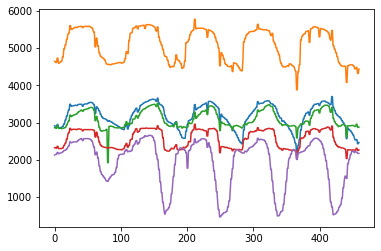

In [100]:
ra = sio.loadmat(r'C:\data_processing\chx_ra')['ra']
type(ra)
plt.plot(ra[4400:4860,0:5])
plt.show()